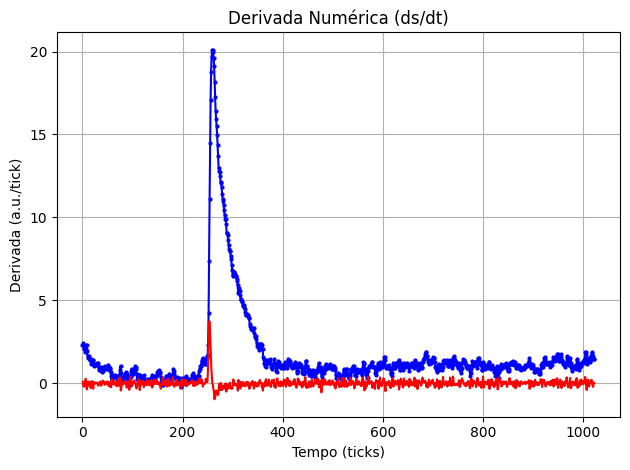

[ 5.14273022e+01  6.04360090e+01  1.01387053e+00  6.53578168e+03
 -6.85115837e+01  6.52756645e+01  2.90234290e+01  6.04415363e+01]
Waveform filtrada salva em: ../waveforms/39357/waveform_1050_filtered.txt


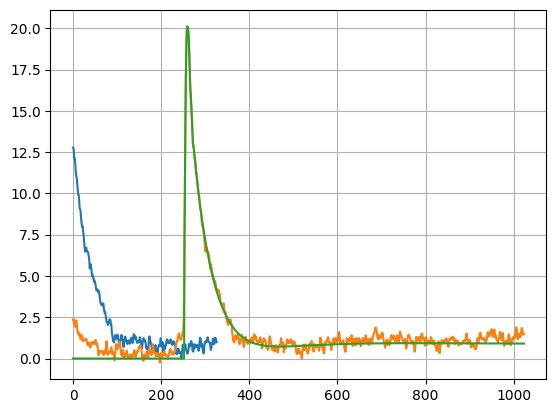

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os

file_name = "../waveforms/39357/waveform_1050.txt"

data = np.loadtxt(file_name)

# Separa as colunas
t = data[:, 0]
s = data[:, 1]

# Plota o waveform (opcional)
plt.plot(t, s, color='blue', marker='o', markersize=2, linestyle='-')
plt.xlabel("Time (ticks)")
plt.ylabel("Signal (a.u.)")
plt.title(f"Waveform - {file_name}")
plt.grid(True)

dt = np.diff(t)
ds = np.diff(s)
derivada = ds / dt

# Ajusta eixo de tempo da derivada (um ponto a menos)
t_deriv = t[:-1] + dt / 2

plt.plot(t_deriv, derivada, color='red')
plt.title("Derivada Numérica (ds/dt)")
plt.xlabel("Tempo (ticks)")
plt.ylabel("Derivada (a.u./tick)")
plt.grid(True)

plt.tight_layout()
plt.show()

indice_max=np.argmax(derivada[:700])

filtered=np.concatenate([np.zeros(indice_max),s[indice_max:]])

ind_plus=20
test_signal=filtered[indice_max+ind_plus:600]

from scipy.optimize import curve_fit

def exp(x,A1,tau1,A2,tau2,A3,tau3,A4,tau4):
    return A1*np.exp(-x/tau1)+A2*np.exp(-x/tau2)+A3*np.exp(-x/tau3)+A4*np.exp(-x/tau4)

plt.plot(test_signal)

param,error = curve_fit(exp,np.arange(0,len(test_signal),1),test_signal,p0=[2,50,2,100,2,100,1,100],maxfev=500000)
print(param)


filtered=np.concatenate([filtered[:indice_max+ind_plus],exp(np.arange(0,len(filtered)-indice_max-ind_plus),*param)])
plt.plot(s)
plt.plot(filtered)
plt.grid()
#plt.yscale("log")

base, ext = os.path.splitext(file_name)
output_file = base + "_filtered" + ext

# Salva duas colunas: tempo e sinal filtrado
np.savetxt(output_file, np.column_stack((t, filtered)), fmt="%.6e", delimiter="\t")

print(f"Waveform filtrada salva em: {output_file}")

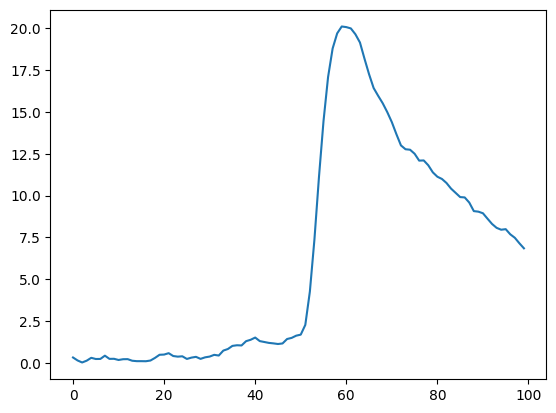

In [15]:
plt.plot(s[200:300])